# DATA602: Final Project Proposal

## Eric Lehmphul

## Introduction 

The data source that I intend to use for the final project relates to human stress detection, more specifically stress detection though sleep. Sleep is an essential function to the human body, as it allows the body and mind to recharge. Stress impacts everyday encounters/activities whether it be relationships, work, or general health. "Sleep and mood are closely connected; poor or inadequate sleep can cause irritability and stress, while healthy sleep can enhance well-being" (*Sleep and mood*). The goal of this project will be to find what variables related to sleep are strong indicators of stress level. I will then use those variables to create a classification model to predict stress level.

## Research Question

What are the most influential indicators that someone is stressed while they are sleeping? How accurate is a machine learning model (ordinal logistic regression / decision forest), using the most influential variables, in predicting stressed people?

## Justification - why is this relevant to you or industry?

Stress impacts all areas of life, especially someone's health. Being able to detect stress and provide a way to manage it early on can reduce the risk of damage to an individual's well being. According to Webmd.com some health problems related to stress are:
* Heart disease
* Obesity
* Headaches
* Depression
* Accelerated aging

## Data Sources - did you find this data online or collect yourself? Provide links

I found this data source on Kaggle.com at the following link: https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep?select=SaYoPillow.csv. 

The data source provides the necessary information to identify stress level during sleep. This data source contains 9 variables:
* `sr` - snoring rate
* `rr` - respiration rate
* `t` - body temperature
* `lm` - limb movement
* `bo` - blood oxygen
* `rem` - ete movement
* `sh` - sleeping hours
* `hr` - heart rate
* `sl` - stress level

## Libraries potentially being used.

List of libraries I plan to use:
* **Pandas** for data cleaning and data manipulation
* **matplotlib** for creating graphs
* **matplotlib.pyplot** for graphing
* **seaborn** for creating plots
* **plotly.express** for creaing interactive graphs
* **statsmodels.miscmodels.ordinal_model** to create an ordinal logistic regression model (from statsmodels.miscmodels.ordinal_model import OrderedModel)
* **scikit-learn** for machine learning (would use if there is a function for ordinal logistic regression but I am not sure if scikit-learn one. May try a decision tree/forest model)

## EDA and summary statistics.


In [38]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

### Data File Exploration

The data consists of 9 columns and 630 rows. There are 8 numeric variables and 1 order categorical variable in this dataset. Currently the categorical variable, `sl` (stress level), is considered an int data type and will need to be transformed into a category data type. Below is the first few rows of the data set and the basic information from the dataset.

In [4]:
stress_data = pd.read_csv('https://raw.githubusercontent.com/SaneSky109/DATA602/main/Final_Project/SaYoPillow.csv')

# There are 2 sr one is supposed to be sh for sleeping hours
stress_data.head()

# correct column name
stress_data.rename(columns = {'sr.1':'sh'}, inplace = True)

stress_data.head()

,sr,rr,t,lm,bo,rem,sh,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [5]:
stress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sh      630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


### Descriptive Statistics

Some notable statistics:
* The average sleeping hours (`sh`) is 3.7 hours with a min of 0 and a max of 9.
* Stress level (`sl`) has 5 ordered classes:
  - **0** - low / normal
  - **1** - medium low
  - **2** - medium
  - **3** - medium high
  - **4** - high
* There is a large standard deviation in the snoring rate (`sr`), indicating that the data is spread out.

In [10]:
stress_data.describe()

,sr,rr,t,lm,bo,rem,sh,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


The ordered categorical variable, `sl` has balanced groups. Each group consists of 126 records.

In [12]:
stress_data['sl'].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: sl, dtype: int64

There are no missing values in the dataset.

In [11]:
stress_data.isnull().sum()

sr     0
rr     0
t      0
lm     0
bo     0
rem    0
sh     0
hr     0
sl     0
dtype: int64

### Visualizations

#### Histograms / Density Plots

There appears to be many bimodal variable distributions. Snoring rate, limb movement, blood oxygen, and rapid eye movement all appear to be bimodal. Body temperature appears to be the most normally distributed of all the variables. Heart rate and sleeping hours appear to be right skewed.

[Text(0.5, 1.0, 'Stress Level')]

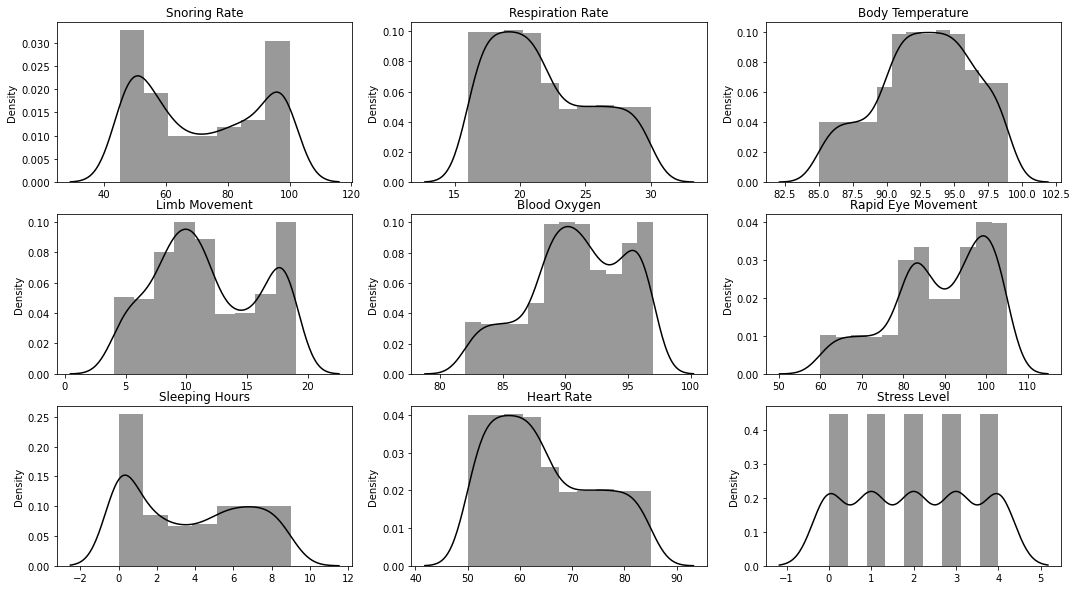

In [39]:
figure, axis = plt.subplots(3, 3, figsize=(18, 10))

seaborn.distplot(stress_data['sr'], ax = axis[0,0], hist = True, kde = True, color = "black", axlabel = False).set(title='Snoring Rate')
seaborn.distplot(stress_data['rr'], ax = axis[0,1], hist = True, kde = True, color = "black", axlabel = False).set(title='Respiration Rate')
seaborn.distplot(stress_data['t'], ax = axis[0,2], hist = True, kde = True, color = "black", axlabel = False).set(title='Body Temperature')
seaborn.distplot(stress_data['lm'], ax = axis[1,0], hist = True, kde = True, color = "black", axlabel = False).set(title='Limb Movement')
seaborn.distplot(stress_data['bo'], ax = axis[1,1], hist = True, kde = True, color = "black", axlabel = False).set(title='Blood Oxygen')
seaborn.distplot(stress_data['rem'], ax = axis[1,2], hist = True, kde = True, color = "black", axlabel = False).set(title='Rapid Eye Movement')
seaborn.distplot(stress_data['sh'], ax = axis[2,0], hist = True, kde = True, color = "black", axlabel = False).set(title='Sleeping Hours')
seaborn.distplot(stress_data['hr'], ax = axis[2,1], hist = True, kde = True, color = "black", axlabel = False).set(title='Heart Rate')
seaborn.distplot(stress_data['sl'], ax = axis[2,2], hist = True, kde = True, color = "black", axlabel = False).set(title='Stress Level')


In [1]:
# Ideas for visualizations

# create an binary variable above 8 hour sleep / below 8 hour sleep and compare the stess levels across groups
# compare heart rate across the different groups for stress level and or hours of sleep

## References

* *Sleep and mood*. Sleep and Mood | Need Sleep. (n.d.). Retrieved April 10, 2022, from https://healthysleep.med.harvard.edu/need-sleep/whats-in-it-for-you/mood#:~:text=The%20Takeaway,such%20as%20anxiety%20or%20depression. 
* Griffin, R. M. (n.d.). 10 stress-related health problems that you can fix. WebMD. Retrieved April 10, 2022, from https://www.webmd.com/balance/stress-management/features/10-fixable-stress-related-health-problems 